# "backtesting crypto"
> "How to fetch and backtest crypto data using fastquant"

- toc: true
- branch: master
- badges: true
- comments: true
- author: Jerome de Leon
- categories: [crypto, backtest, grid search]

<a href="https://colab.research.google.com/github/enzoampil/fastquant/blob/master/examples/2020-05-20-backtest_crypto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# uncomment to install in colab
# !pip3 install fastquant --update
# or pip uninstall fastquant && pip install git+https://www.github.com/enzoampil/fastquant.git@history

## fetch data from binance

In [2]:
from fastquant import get_crypto_data

crypto = get_crypto_data("BTC/USDT", 
                         "2018-12-01", 
                         "2019-12-31",
                         time_resolution='1d'
                        )

In [3]:
crypto.tail()

,open,high,low,close,volume
dt,,,,,
2019-12-27,7202.00,7275.86,7076.42,7254.74,33642.701861
2019-12-28,7254.77,7365.01,7238.67,7316.14,26848.982199
2019-12-29,7315.36,7528.45,7288.00,7388.24,31387.106085
2019-12-30,7388.43,7408.24,7220.00,7246.00,29605.911782
2019-12-31,7246.00,7320.00,7145.01,7195.23,25954.453533


## run backtest with a grid of values

In [4]:
from fastquant import backtest

results = backtest('smac', 
                   crypto, 
                   fast_period=[7,14,21,28], 
                   slow_period=[30,45,60,75],
                   plot=False,
                   verbose=False
                  )

===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
fast_period : 7
slow_period : 30
Final Portfolio Value: 167957.05730000004
Final PnL: 67957.06
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
fast_period : 7
slow_period : 45
Final Portfolio Value: 200109.894525
Final PnL: 100109.89
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
fast_period : 7
slow_period : 60
Final Portfolio Value: 189298.80590000006
Final PnL: 89298.81
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
fast_period : 7
slow_period : 75
Final Portfolio Value: 258316.23405000006
Final PnL: 158316.23
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level argume

In [5]:
results.head()

,strat_id,init_cash,buy_prop,sell_prop,commission,execution_type,fast_period,slow_period,rtot,ravg,rnorm,rnorm100,sharperatio,pnl,final_value
0,3,100000,1,1,0.0075,close,7,75,0.949014,0.002397,0.829272,82.927229,0.987367,158316.23,258316.234050
1,14,100000,1,1,0.0075,close,28,60,0.931504,0.002352,0.809002,80.900205,0.986999,153832.42,253832.420400
2,7,100000,1,1,0.0075,close,14,75,0.830975,0.002098,0.696898,69.689847,0.984563,129555.54,229555.539175
3,11,100000,1,1,0.0075,close,21,75,0.782243,0.001975,0.645083,64.508323,0.983142,118637.07,218637.072700
4,15,100000,1,1,0.0075,close,28,75,0.769574,0.001943,0.631874,63.187426,0.982741,115884.74,215884.739100


That's a 258% maximum profit using only SMAC because bitcoin was bullish all time long!

In [6]:
#get best parameters on top row 
fast_best, slow_best = results.iloc[0][["fast_period","slow_period"]]
fast_best, slow_best

(7, 75)

## run backtest using optimum values

In [7]:
import matplotlib as pl
pl.style.use("default")
pl.rcParams["figure.figsize"] = (9,5)

===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
fast_period : 7
slow_period : 75
Final Portfolio Value: 258316.23405000006
Final PnL: 158316.23
Time used (seconds): 0.15674495697021484
Optimal parameters: {'init_cash': 100000, 'buy_prop': 1, 'sell_prop': 1, 'commission': 0.0075, 'execution_type': 'close', 'fast_period': 7, 'slow_period': 75}
Optimal metrics: {'rtot': 0.9490143617322465, 'ravg': 0.002396500913465269, 'rnorm': 0.8292722866407841, 'rnorm100': 82.92722866407841, 'sharperatio': 0.9873670567519415, 'pnl': 158316.23, 'final_value': 258316.23405000006}


<IPython.core.display.Javascript object>


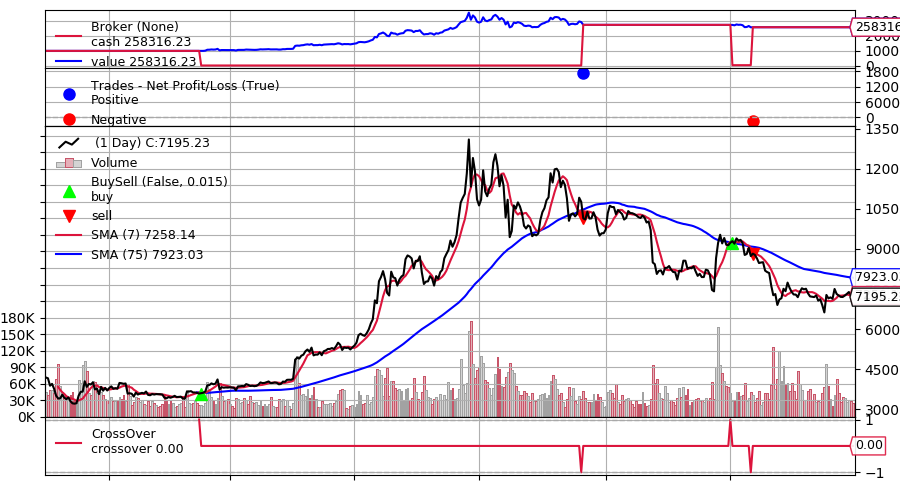

In [8]:
results = backtest('smac', 
                   crypto, 
                   fast_period=fast_best, 
                   slow_period=slow_best,
                   plot=True,
                   verbose=False
                  )

## accessing history of transactions

This is done by setting `return_history`=True.

### single strategy

In [9]:
results, history = backtest('smac', 
                               crypto, 
                               fast_period=fast_best, 
                               slow_period=slow_best,
                               plot=False,
                               verbose=False,
                               return_history=True
                              )

===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
fast_period : 7
slow_period : 75
Final Portfolio Value: 258316.23405000006
Final PnL: 158316.23
Time used (seconds): 0.10384821891784668
Optimal parameters: {'init_cash': 100000, 'buy_prop': 1, 'sell_prop': 1, 'commission': 0.0075, 'execution_type': 'close', 'fast_period': 7, 'slow_period': 75}
Optimal metrics: {'rtot': 0.9490143617322465, 'ravg': 0.002396500913465269, 'rnorm': 0.8292722866407841, 'rnorm100': 82.92722866407841, 'sharperatio': 0.9873670567519415, 'pnl': 158316.23, 'final_value': 258316.23405000006}


In [10]:
results

,strat_id,init_cash,buy_prop,sell_prop,commission,execution_type,fast_period,slow_period,rtot,ravg,rnorm,rnorm100,sharperatio,pnl,final_value
0,0,100000,1,1,0.0075,close,7,75,0.949014,0.002397,0.829272,82.927229,0.987367,158316.23,258316.23405


In [11]:
history.keys()

dict_keys(['orders', 'periodic'])

In [12]:
orders = history['orders']
orders

,strat_id,strat_name,dt,type,price,size,value,commission,pnl,csum,returns
0,0,fast_period7_slow_period75,2019-02-15,buy,3590.56,27,96945.12,727.088400,0.00,99272.911600,NaN
1,0,fast_period7_slow_period75,2019-08-21,sell,10142.57,-27,96945.12,2053.870425,176904.27,274123.311175,1.761310
2,0,fast_period7_slow_period75,2019-11-02,buy,9231.61,29,267716.69,2007.875175,0.00,272115.436000,-0.007325
3,0,fast_period7_slow_period75,2019-11-12,sell,8821.94,-29,267716.69,1918.771950,-11880.43,258316.234050,-0.050711


The final value in `results` can be calculated from the `commission` and `pnl` (profit & loss) of all the closed (bought and sold) transactions in history:

In [13]:
r = results.squeeze()
r.final_value

258316.23405000006

In [14]:
r.init_cash + orders.pnl.sum() - orders.commission.sum()

258316.23405000003

## comparing returns of two different single strategies

In [15]:
results1, history1 = backtest('smac', 
                               crypto, 
                               fast_period=7, 
                               slow_period=60,
                               plot=False,
                               verbose=False,
                               return_history=True
                              )
results2, history2 = backtest('rsi', 
                               crypto, 
                               rsi_lower=30, 
                               rsi_upper=80,
                               plot=False,
                               verbose=False,
                               return_history=True
                              )

===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
fast_period : 7
slow_period : 60
Final Portfolio Value: 189298.80590000006
Final PnL: 89298.81
Time used (seconds): 0.16254806518554688
Optimal parameters: {'init_cash': 100000, 'buy_prop': 1, 'sell_prop': 1, 'commission': 0.0075, 'execution_type': 'close', 'fast_period': 7, 'slow_period': 60}
Optimal metrics: {'rtot': 0.6381565642305342, 'ravg': 0.001611506475329632, 'rnorm': 0.5009520875414529, 'rnorm100': 50.09520875414529, 'sharperatio': 0.9776032839426804, 'pnl': 89298.81, 'final_value': 189298.80590000006}
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
rsi_period : 14
rsi_upper : 80
rsi_lower : 30
Final Portfolio Value: 126646.58264999998
Final PnL: 26646.58
Time used (seconds): 0.07407784461975098
Optimal parameters: {'init_cash': 100000, 'buy_prop': 1, 'sell_prop': 1, 'commiss

In [16]:
merged = history1['periodic'].merge(history2['periodic'], 
                                    on='dt', 
                                    suffixes=('_smac','_rsi')
                                   )
merged = merged.set_index('dt')

<IPython.core.display.Javascript object>


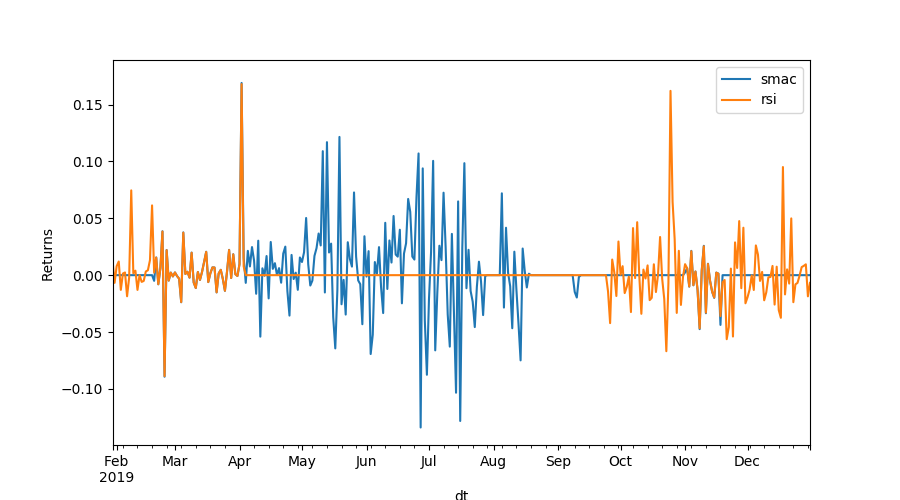

In [17]:
merged.plot.scatter(x='returns_smac', y='returns_rsi')

In [18]:
ax = merged.returns_smac.plot(label='smac')
merged.returns_rsi.plot(label='rsi')
ax.legend()
ax.set_ylabel("Returns")

Text(0, 0.5, 'Returns')

### single strategy with grid search

In [ ]:
results, history = backtest('smac', 
                               crypto, 
                               fast_period=[7,14,21], 
                               slow_period=[30,45,60],
                               plot=False,
                               verbose=False,
                               return_history=True
                              )

In [20]:
history['orders']

,strat_id,strat_name,dt,type,price,size,value,commission,pnl,csum,returns
0,0,fast_period7_slow_period30,2019-02-12,buy,3631.05,27,98038.35,735.287625,0.00,99264.712375,NaN
1,0,fast_period7_slow_period30,2019-06-10,sell,7982.75,-27,98038.35,1616.506875,117495.90,215144.105500,1.167378
2,0,fast_period7_slow_period30,2019-06-16,buy,8808.70,24,211408.80,1585.566000,0.00,213558.539500,-0.007370
3,0,fast_period7_slow_period30,2019-07-17,sell,9667.92,-24,211408.80,1740.225600,20621.28,232439.593900,0.088412
4,0,fast_period7_slow_period30,2019-08-06,buy,11828.80,19,224747.20,1685.604000,0.00,230753.989900,-0.007252
...,...,...,...,...,...,...,...,...,...,...,...
1,8,fast_period21_slow_period60,2019-08-04,sell,10929.23,-24,98826.24,1967.261400,163475.28,260766.821800,1.627140
2,8,fast_period21_slow_period60,2019-08-20,buy,10915.54,23,251057.42,1882.930650,0.00,258883.891150,-0.007221
3,8,fast_period21_slow_period60,2019-08-28,sell,9721.00,-23,251057.42,1676.872500,-27474.42,229732.598650,-0.112604
4,8,fast_period21_slow_period60,2019-11-10,buy,8809.41,25,220235.25,1651.764375,0.00,228080.834275,-0.007190


<IPython.core.display.Javascript object>


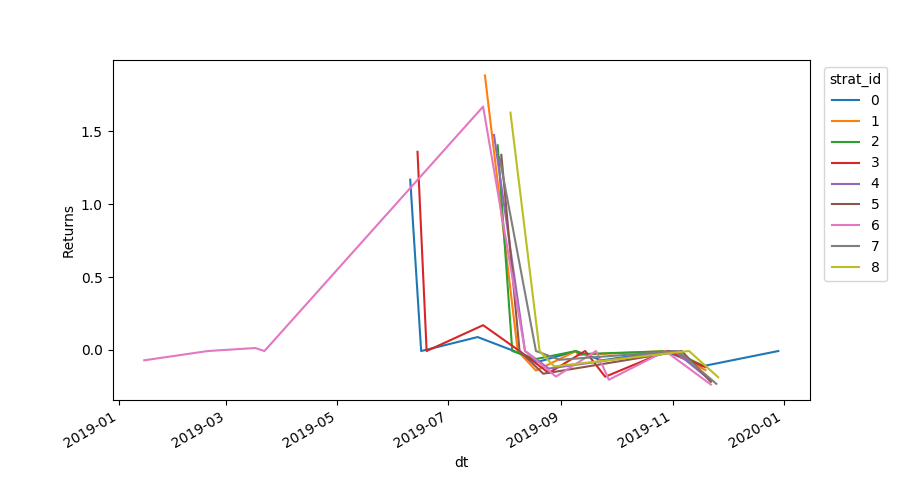

In [21]:
key = 'strat_id'
orders = history['orders']
g = orders.set_index('dt').groupby(key)
axs = g.returns.plot(legend=key)
axs[0].set_ylabel('Returns')
axs[0].legend(g.groups, title=key, bbox_to_anchor=(1.01, 1), loc='upper left')

### multi strategy

In [ ]:
from fastquant import backtest

strats= {
       'smac': {
           'fast_period': 7, 
           'slow_period': 28
            },
        'rsi': {
            'rsi_upper': 70,
            'rsi_lower': 30 
        }
   }
results, history = backtest('multi', 
                               crypto, 
                               strats=strats,
                               plot=False,
                               verbose=False,
                               return_history=True
                              )

<IPython.core.display.Javascript object>


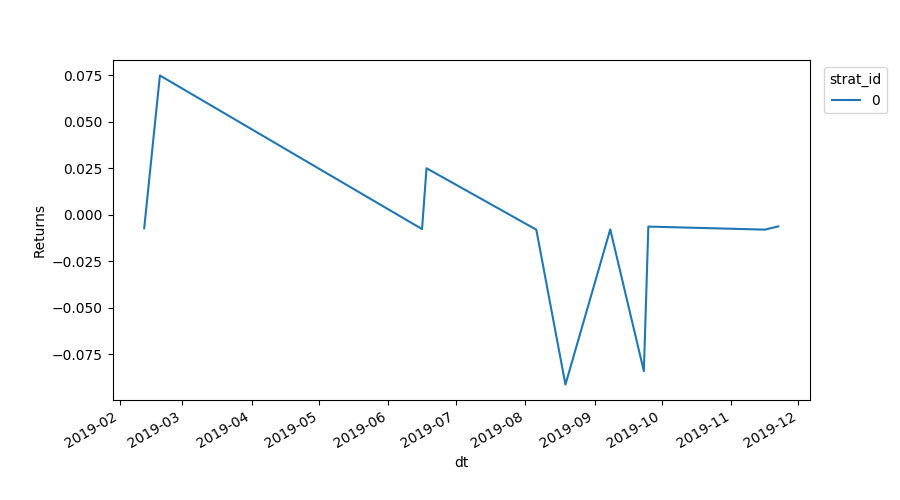

In [18]:
key = 'strat_id'
orders = history['orders']
g = orders.set_index('dt').groupby(key)
axs = g.returns.plot(legend=key)
axs[0].set_ylabel('Returns')
axs[0].legend(g.groups, title=key, bbox_to_anchor=(1.01, 1), loc='upper left')

In [23]:
from fastquant import backtest

strats= {
       'smac': {
           'fast_period': [7,14], 
           'slow_period': [30,60]
            },
        'rsi': {
            'rsi_upper': [70,80],
            'rsi_lower': [20,30] 
        }
   }
results, history = backtest('multi', 
                               crypto, 
                               strats=strats,
                               plot=False,
                               verbose=False,
                               return_history=True
                              )

===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
fast_period : 7
slow_period : 30
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
rsi_period : 14
rsi_upper : 70
rsi_lower : 20
Final Portfolio Value: 101479.475225
Final PnL: 1479.48
Final Portfolio Value: 101479.475225
Final PnL: 1479.48
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
fast_period : 7
slow_period : 30
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
rsi_period : 14
rsi_upper : 70
rsi_lower : 30
Final Portfolio Value: 92990.43297500002
Final PnL: -7009.57
Final Portfolio Value: 92990.43297500002
Final PnL: -7009.57
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strate

In [24]:
history['orders']

,strat_id,strat_name,dt,type,price,size,value,commission,pnl,csum,returns
0,0,smac.fast_period7_slow_period30,2019-01-14,sell,3626.09,-30,96351.60,815.87025,12431.10,111615.22975,NaN
1,0,smac.fast_period7_slow_period30,2019-02-12,buy,3631.05,30,108931.50,816.98625,0.00,110798.24350,-0.007320
2,0,smac.fast_period7_slow_period30,2019-06-16,buy,8808.70,13,114513.10,858.84825,0.00,109939.39525,-0.007751
3,0,smac.fast_period7_slow_period30,2019-08-06,buy,11828.80,10,118288.00,887.16000,0.00,109052.23525,-0.008070
4,0,smac.fast_period7_slow_period30,2019-08-19,sell,10915.54,-10,118288.00,818.66550,-9132.60,99100.96975,-0.091252
...,...,...,...,...,...,...,...,...,...,...,...
2,15,smac.fast_period14_slow_period60,2019-11-22,sell,7268.23,-14,118903.96,763.16415,-17148.74,57300.44735,-0.238151
0,15,rsi.rsi_upper80_rsi_lower30,2018-12-16,buy,3211.72,30,96351.60,722.63700,0.00,99277.36300,NaN
1,15,rsi.rsi_upper80_rsi_lower30,2019-04-03,sell,4932.60,-30,96351.60,1109.83500,51626.40,149793.92800,0.508843
2,15,rsi.rsi_upper80_rsi_lower30,2019-09-25,buy,8493.14,14,118903.96,891.77970,0.00,148902.14830,-0.005953


<IPython.core.display.Javascript object>


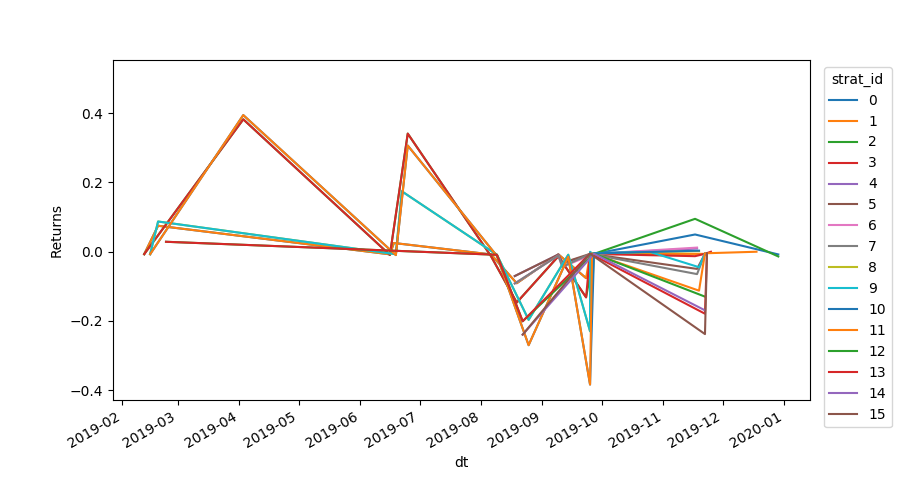

In [25]:
key = 'strat_id'
orders = history['orders']
g = orders.set_index('dt').groupby(key)
axs = g.returns.plot(legend=key)
axs[0].set_ylabel('Returns')
axs[0].legend(g.groups, title=key, bbox_to_anchor=(1.01, 1), loc='upper left')

### custom strategy

In [25]:
import numpy as np

#add a column which is a proxy buy/sell indicator for custom strategy
crypto["custom"] = crypto.close.pct_change()

In [26]:
results, history = backtest('custom', 
                                crypto, 
                                upper_limit=0.05, 
                                lower_limit=-0.05,
                                plot=False,
                                verbose=False,
                                return_history=True
                                )

===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
Upper limit:  0.05
Lower limit:  -0.05
Final Portfolio Value: 165576.88775000008
Final PnL: 65576.89
Time used (seconds): 0.11649560928344727
Optimal parameters: {'init_cash': 100000, 'buy_prop': 1, 'sell_prop': 1, 'commission': 0.0075, 'execution_type': 'close', 'upper_limit': 0.05, 'lower_limit': -0.05, 'custom_column': 'custom'}
Optimal metrics: {'rtot': 0.5042654794956734, 'ravg': 0.0012733976754941247, 'rnorm': 0.3783625190470573, 'rnorm100': 37.83625190470573, 'sharperatio': 0.7416913074113402, 'pnl': 65576.89, 'final_value': 165576.88775000008}


<IPython.core.display.Javascript object>


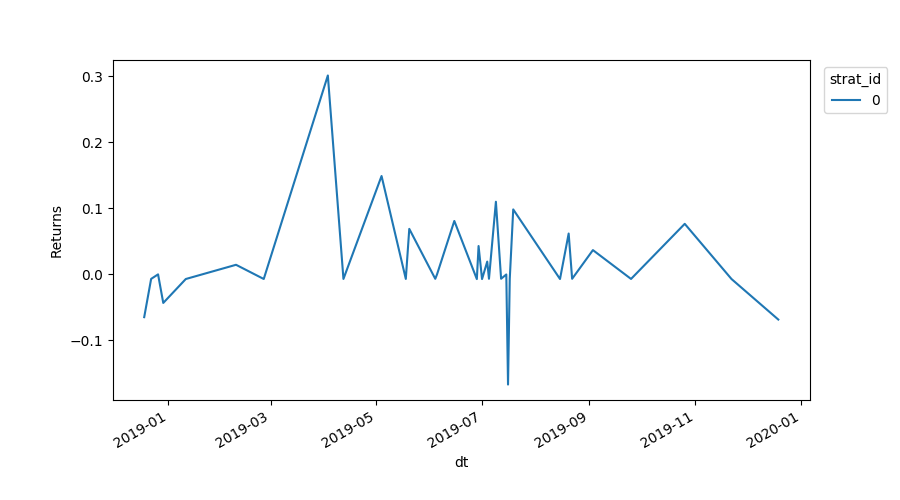

In [27]:
key = 'strat_id'
orders = history['orders']
g = orders.set_index('dt').groupby(key)
axs = g.returns.plot(legend=key)
axs[0].set_ylabel('Returns')
axs[0].legend(g.groups, title=key, bbox_to_anchor=(1.01, 1), loc='upper left')